<a href="https://colab.research.google.com/github/ancestor9/2025_Fall_AI-Model-Operations-MLOps/blob/main/week11/Reinforcement_Learning_Q_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://media.istockphoto.com/id/638090362/ko/%EC%82%AC%EC%A7%84/%EC%9D%B8%EA%B3%B5-%EC%A7%80%EB%8A%A5-%EC%9D%B4%EB%8F%99-%ED%94%8C%EB%A0%88%EC%9D%B4%EC%96%B4-%EA%B0%9C%EB%85%90.webp?a=1&b=1&s=612x612&w=0&k=20&c=li38iDlQpmJfXoh8p_QrP2C-_Y8JID4xONGNxVRnmgA='>

# 1. Environment and Q-Table Definition

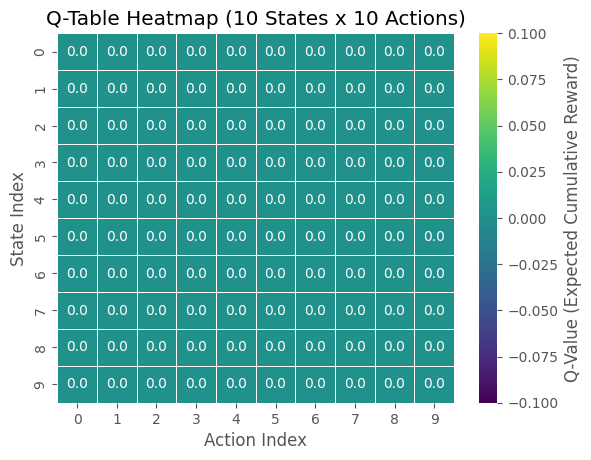

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Environment and Q-Table Definition
NUM_STATES = 10
NUM_ACTIONS = 10
Q = np.zeros([NUM_STATES, NUM_ACTIONS])

## 1-1. Q-Table Heatmap
# Annotate=True to show the Q-values directly
sns.heatmap(Q.round(1), annot=True, fmt=".1f", cmap='viridis', linewidths=.5, cbar_kws={'label': 'Q-Value (Expected Cumulative Reward)'})
plt.title('Q-Table Heatmap (10 States x 10 Actions)')
plt.xlabel('Action Index')
plt.ylabel('State Index')
plt.show()

# 2. Hyperparameters
- 학습률 (ALPHA): 0.1로 설정되어, 새로운 경험을 10%만 반영하여 안정적인 학습을 추구
- 할인 계수 (GAMMA): 0.9로 설정되어, 미래 보상을 중요하게 평가하여 장기적인 목표 달성을 선호
- 탐험률 (EPSILON): 0.1로 설정되어, 90% 활용(Exploitation)과 10% 탐험(Exploration)의 균형을 유지
- 총 에피소드 (NUM_EPISODES): 3000회로 설정되어, 총 3000번의 독립적인 게임 반복을 통해 학습
- 목표 상태 (GOAL_STATE): 9로 설정되어, 미로의 최종 목적지는 상태 9
- 성공 보상 (SUCCESS_REWARD): 100으로 설정되어, 목표 도달 시 큰 보상을 제공하여 학습을 강화

In [39]:
ALPHA = 0.1     # Learning Rate
GAMMA = 0.9     # Discount Factor
EPSILON = 0.1   # Epsilon-Greedy
NUM_EPISODES = 3000
GOAL_STATE = 9
SUCCESS_REWARD = 100
reward_history = []

# 3. Next State and Reward Function

$$\large Q(s, a) \leftarrow Q(s, a) + \alpha \cdot \left[ r + \gamma \cdot \max_{a'} Q(s', a') - Q(s, a) \right]$$

In [ ]:

def get_next_state_and_reward(state, action):
    # Action is the desired next state index (0-9)
    next_state = np.clip(action, 0, NUM_STATES - 1)

    reward = -1 # Penalty for moving

    # Success condition
    if next_state == GOAL_STATE and state != GOAL_STATE:
        reward = SUCCESS_REWARD

    # Goal state reached
    if state == GOAL_STATE:
        next_state = GOAL_STATE
        reward = 0

    return next_state, reward

# 4. Q-Learning Training Loop

In [46]:

print(f"Starting Q-Learning Training (Q-Table size: {NUM_STATES}x{NUM_ACTIONS})...")

for episode in range(NUM_EPISODES):

    # Start from a random state (0 to 8)
    state = np.random.randint(0, NUM_STATES - 1)

    # Print the starting state for the first 10 episodes
    if episode < 10:
        print(f"Episode {episode + 1}: Starts at State {state}")

    total_reward = 0

    while state != GOAL_STATE:

        # 4-1. Action Selection (Epsilon-Greedy)
        if np.random.rand() < EPSILON:
            action = np.random.randint(NUM_ACTIONS) # Exploration
        else:
            action = np.argmax(Q[state, :]) # Exploitation

        # 4-2. Execution and Observation
        next_state, reward = get_next_state_and_reward(state, action)
        total_reward += reward

        # 4-3. Q-Table Update (Q-Learning Core Formula)
        old_q_value = Q[state, action]
        max_next_q = np.max(Q[next_state, :])

        new_q_value = (1 - ALPHA) * old_q_value + ALPHA * (reward + GAMMA * max_next_q)
        Q[state, action] = new_q_value

        # 4-4. State Update
        state = next_state

    reward_history.append(total_reward)

print("Training complete.")
print("-" * 50)

Starting Q-Learning Training (Q-Table size: 10x10)...
Episode 1: Starts at State 2
Episode 2: Starts at State 1
Episode 3: Starts at State 7
Episode 4: Starts at State 3
Episode 5: Starts at State 4
Episode 6: Starts at State 6
Episode 7: Starts at State 8
Episode 8: Starts at State 4
Episode 9: Starts at State 3
Episode 10: Starts at State 5
Training complete.
--------------------------------------------------


# 5. Visualization
## 5-1. Learning Curve (Reward History)

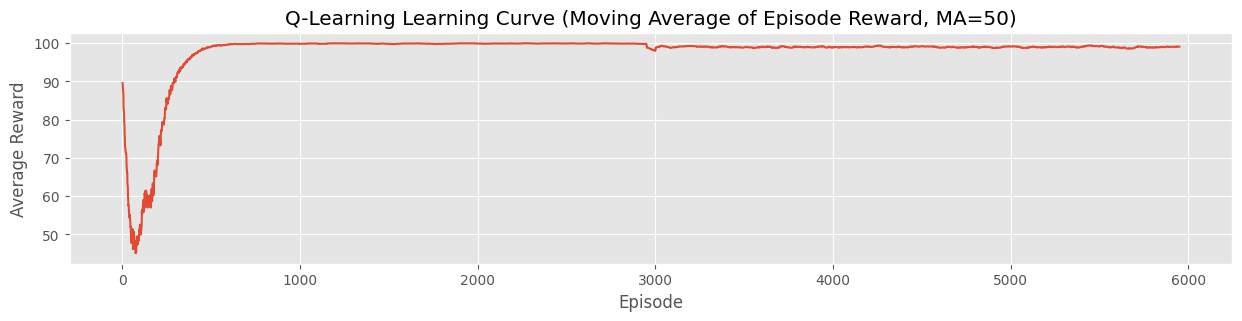

In [47]:

plt.style.use('ggplot')

## 5-1. Learning Curve (Reward History)
plt.figure(figsize=(15, 3))
# Use Moving Average to smooth the curve (window size 50)
window_size = 50
moving_avg = np.convolve(reward_history, np.ones(window_size)/window_size, mode='valid')

plt.plot(moving_avg)
plt.title(f'Q-Learning Learning Curve (Moving Average of Episode Reward, MA={window_size})')
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.grid(True)
plt.show()

## 5-2. Q-Table Heatmap

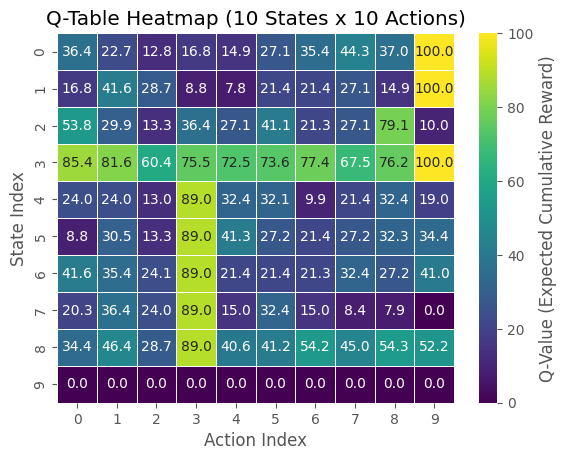

In [48]:
# Annotate=True to show the Q-values directly
sns.heatmap(Q.round(1), annot=True, fmt=".1f", cmap='viridis', linewidths=.5, cbar_kws={'label': 'Q-Value (Expected Cumulative Reward)'})
plt.title('Q-Table Heatmap (10 States x 10 Actions)')
plt.xlabel('Action Index')
plt.ylabel('State Index')
plt.show()

### Optimal Policy Check 결과는 에이전트가 목표로 바로 가는 핵심 정책은 파악했지만, 일부 상태에 대해서는 아직 최적화가 완벽하지 않음을 시사
- 좀 더 정확한 최적 정책을 얻으려면 에피소드 횟수를 늘리거나 $\epsilon$ 값 (탐험률)을 조정하여 에이전트가 모든 상태-행동 쌍을 더 많이 탐험하도록 해야 함

In [44]:
print("-" * 50)
print("💡 Optimal Policy Check (Best Action per State):")
# Check optimal action for all states
for s in range(NUM_STATES):
    best_action_index = np.argmax(Q[s, :])
    print(f"State {s}: Optimal Action is {best_action_index}")

--------------------------------------------------
💡 Optimal Policy Check (Best Action per State):
State 0: Optimal Action is 9
State 1: Optimal Action is 9
State 2: Optimal Action is 9
State 3: Optimal Action is 9
State 4: Optimal Action is 9
State 5: Optimal Action is 9
State 6: Optimal Action is 9
State 7: Optimal Action is 9
State 8: Optimal Action is 9
State 9: Optimal Action is 0


# Deep Q-Network (DQN)
- **Q-테이블(Q-Table)** 이 **심층 신경망(Deep Neural Network)** 으로 대체되는 Q-테이블 대신 신경망을 사용하는 방식

**1. 라이브러리 추가 및 모델 정의**

numpy 외에 딥러닝 모델 구축을 위해 Keras (TensorFlow) 라이브러리를 추가

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam # Adam Optimizer 사용

# 1. 환경 정의 (이전과 동일)
NUM_STATES = 10
NUM_ACTIONS = 10

# 2. Q-네트워크 모델 정의 함수
def build_model():
    model = Sequential()
    # 입력층: 상태(10)를 입력받음
    # 간단한 Dense layer 2개를 사용
    model.add(Dense(24, input_dim=NUM_STATES, activation='relu'))
    model.add(Dense(24, activation='relu'))
    # 출력층: 10개의 행동 각각에 대한 Q-값을 출력
    model.add(Dense(NUM_ACTIONS, activation='linear'))
    # DQN에서는 손실 함수로 MSE(평균 제곱 오차)를 사용
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.001))
    return model

# Q-테이블 대신 Q-네트워크 모델을 초기화합니다.
model = build_model()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 24)             │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,114 (4.35 KB)

 Trainable params: 1,114 (4.35 KB)

 Non-trainable params: 0 (0.00 B)

**2. 상태 입력 형식 변경 (State Representation)**

Q-러닝에서는 상태를 인덱스(0~9)로 다뤘지만, 신경망은 보통 벡터 입력을 받기 때문에 **원-핫 인코딩(One-Hot Encoding)** 을 사용하여 상태를 벡터 형태로 변환

In [51]:
# 상태 인덱스를 신경망 입력용 벡터로 변환
def state_to_vector(state_index):
    vector = np.zeros(NUM_STATES)
    vector[state_index] = 1.0
    return vector

# 예시: 상태 3 -> [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]

In [54]:
state_to_vector(3)

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

**3. Q-값 계산 및 업데이트 방식 변경**

학습 루프 내부에서 Q-테이블을 직접 업데이트하는 대신, 모델을 학습

In [55]:
# 4. DQN 학습 루프 (수정된 핵심 부분)
for episode in range(NUM_EPISODES):
    state_index = np.random.randint(0, NUM_STATES - 1)
    state_vector = state_to_vector(state_index).reshape(1, NUM_STATES) # 신경망 입력 형태

    # ... (게임 진행)
    while state_index != GOAL_STATE:

        # 4-1. 행동 선택 (Epsilon-Greedy)
        if np.random.rand() < EPSILON:
            action = np.random.randint(NUM_ACTIONS)
        else:
            # 모델을 사용하여 현재 상태의 모든 Q-값 예측
            q_values = model.predict(state_vector, verbose=0)[0]
            action = np.argmax(q_values)

        # 4-2. 행동 실행 및 다음 상태 획득
        next_state_index, reward = get_next_state_and_reward(state_index, action)
        next_state_vector = state_to_vector(next_state_index).reshape(1, NUM_STATES)

        # 4-3. Q-값 타겟 계산 (TD Target)
        # 1. 현재 상태 s의 Q-값 예측값을 복사 (타겟 Q-값)
        target_q_values = model.predict(state_vector, verbose=0)[0]

        # 2. 다음 상태 s'의 최대 Q-값 예측
        max_next_q = np.max(model.predict(next_state_vector, verbose=0)[0])

        # 3. 벨만 방정식으로 타겟 Q-값의 '행동 a' 위치만 갱신
        new_q_value = reward + GAMMA * max_next_q
        target_q_values[action] = new_q_value

        # 4-4. 모델 학습 (가중치 업데이트)
        # s를 입력으로, 갱신된 타겟 Q-값을 정답으로 보고 학습
        model.fit(state_vector, target_q_values.reshape(1, NUM_ACTIONS), epochs=1, verbose=0)

        # 4-5. 상태 업데이트
        state_index = next_state_index
        state_vector = next_state_vector

KeyboardInterrupt: 

**요약: 딥러닝 사용 이점**

- 상태 공간 확장: 딥러닝을 사용하면 Q-테이블처럼 상태를 개별적으로 저장할 필요가 없어, 미로 크기가 수백, 수천, 수만 개로 커지거나, 이미지와 같이 고차원의 입력이 들어와도 처리가 가능

- 일반화: 신경망은 유사한 상태에 대해 비슷한 Q-값을 예측하는 일반화 능력을 가지므로, 모든 상태-행동 쌍을 경험하지 않아도 학습이 가능

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Starting Optimized DQN Training with Experience Replay...

--- Starting States for First 5 Episodes ---
Episode 1: Starts at State 6
Episode 2: Starts at State 6
Episode 3: Starts at State 0
Episode 4: Starts at State 8
Episode 5: Starts at State 4
------------------------------------------
Training complete.
--------------------------------------------------


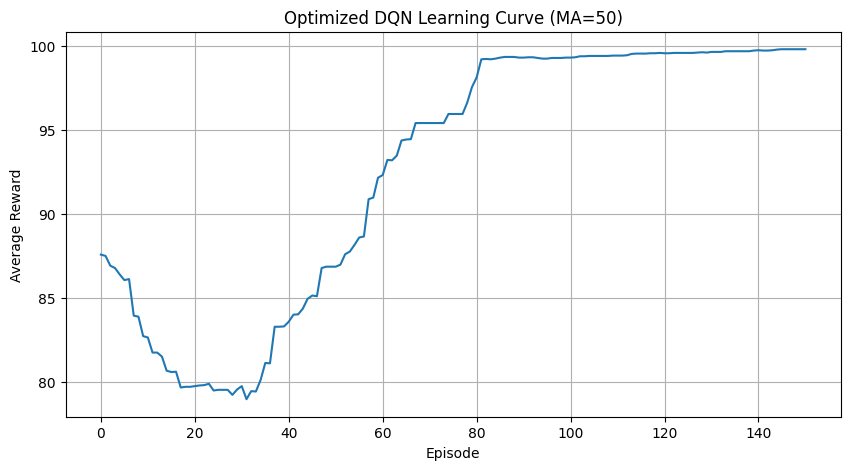

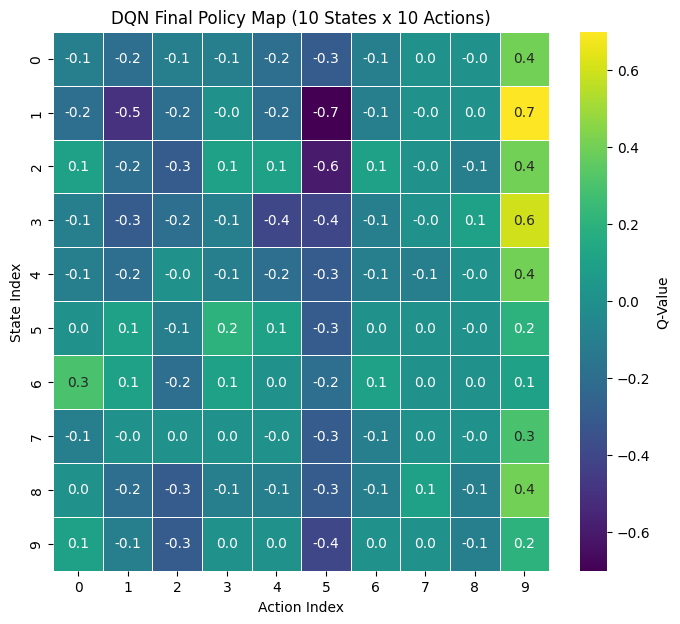

--------------------------------------------------
💡 Optimal Policy Check:
State 0: Optimal Action is 9
State 1: Optimal Action is 9
State 2: Optimal Action is 9
State 3: Optimal Action is 9
State 4: Optimal Action is 9
State 5: Optimal Action is 3
State 6: Optimal Action is 0
State 7: Optimal Action is 9
State 8: Optimal Action is 9
State 9: Optimal Action is 9


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from collections import deque
import random

# 1. 환경 및 하이퍼파라미터 정의
NUM_STATES = 10
NUM_ACTIONS = 10

# Q-러닝 하이퍼파라미터
GAMMA = 0.9
EPSILON = 0.1

# DQN 학습 파라미터 (최적화)
NUM_EPISODES = 200
GOAL_STATE = 9
SUCCESS_REWARD = 100
LEARNING_RATE = 0.001
MEMORY_SIZE = 2000
BATCH_SIZE = 64  # 32→64: 배치 크기 증가로 학습 횟수 감소
UPDATE_FREQUENCY = 4  # 매 스텝마다가 아닌 4스텝마다 학습

memory = deque(maxlen=MEMORY_SIZE)
reward_history = []

# 2. 헬퍼 함수 정의
def get_next_state_and_reward(state, action):
    """환경의 규칙 정의: 다음 상태와 보상 계산"""
    next_state = np.clip(action, 0, NUM_STATES - 1)
    reward = -1

    if next_state == GOAL_STATE and state != GOAL_STATE:
        reward = SUCCESS_REWARD
    if state == GOAL_STATE:
        next_state = GOAL_STATE
        reward = 0

    return next_state, reward

# 상태 변환 최적화: 미리 계산된 원-핫 벡터 사용
STATE_VECTORS = np.eye(NUM_STATES, dtype=np.float32)

def state_to_vector(state_index):
    """미리 계산된 원-핫 벡터 반환 (계산 비용 제거)"""
    return STATE_VECTORS[state_index:state_index+1]

# 3. Q-네트워크 모델 정의 및 초기화
def build_model():
    """Q-함수를 근사하는 심층 신경망(DQN) 모델 구축"""
    model = Sequential([
        Dense(24, input_dim=NUM_STATES, activation='relu'),
        Dense(24, activation='relu'),
        Dense(NUM_ACTIONS, activation='linear')
    ])
    model.compile(loss='mse', optimizer=Adam(learning_rate=LEARNING_RATE))
    return model

model = build_model()

# 4. 경험 재생(Experience Replay) 학습 함수 - 최적화
def replay():
    """메모리에서 무작위 배치를 추출하여 모델을 효율적으로 학습"""
    if len(memory) < BATCH_SIZE:
        return

    minibatch = random.sample(memory, BATCH_SIZE)

    # 배열 사전 할당으로 속도 향상
    states_batch = np.zeros((BATCH_SIZE, NUM_STATES), dtype=np.float32)
    next_states_batch = np.zeros((BATCH_SIZE, NUM_STATES), dtype=np.float32)
    actions = np.zeros(BATCH_SIZE, dtype=np.int32)
    rewards = np.zeros(BATCH_SIZE, dtype=np.float32)
    dones = np.zeros(BATCH_SIZE, dtype=bool)

    # 데이터 일괄 추출
    for i, (state, action, reward, next_state, done) in enumerate(minibatch):
        states_batch[i] = state
        actions[i] = action
        rewards[i] = reward
        next_states_batch[i] = next_state
        dones[i] = done

    # 배치 단위로 Q-값 예측
    current_q_values = model.predict(states_batch, verbose=0)
    next_q_values = model.predict(next_states_batch, verbose=0)

    # 벡터화된 타겟 계산
    targets = current_q_values.copy()
    max_next_q = np.max(next_q_values, axis=1)

    # done=True인 경우와 아닌 경우를 벡터 연산으로 처리
    targets[np.arange(BATCH_SIZE), actions] = np.where(
        dones,
        rewards,
        rewards + GAMMA * max_next_q
    )

    # 모델 학습
    model.fit(states_batch, targets, epochs=1, verbose=0, batch_size=BATCH_SIZE)

# 5. 메인 학습 루프 - 최적화
print(f"Starting Optimized DQN Training with Experience Replay...")
print("\n--- Starting States for First 5 Episodes ---")

step_counter = 0  # 전역 스텝 카운터

for episode in range(NUM_EPISODES):
    state_index = np.random.randint(0, NUM_STATES - 1)
    state_vector = state_to_vector(state_index)

    if episode < 5:
        print(f"Episode {episode + 1}: Starts at State {state_index}")

    total_reward = 0
    done = False

    while not done:
        # 5-1. 행동 선택 (Epsilon-Greedy)
        if np.random.rand() < EPSILON:
            action = np.random.randint(NUM_ACTIONS)
        else:
            q_values = model.predict(state_vector, verbose=0)[0]
            action = np.argmax(q_values)

        # 5-2. 행동 실행 및 다음 상태 획득
        next_state_index, reward = get_next_state_and_reward(state_index, action)
        next_state_vector = state_to_vector(next_state_index)

        done = (next_state_index == GOAL_STATE)
        total_reward += reward

        # 5-3. 경험 저장 (reshape 제거)
        memory.append((state_vector[0], action, reward, next_state_vector[0], done))

        # 5-4. 상태 업데이트
        state_index = next_state_index
        state_vector = next_state_vector

        step_counter += 1

    reward_history.append(total_reward)

    # 5-5. 주기적 배치 학습 (매 에피소드마다가 아닌 UPDATE_FREQUENCY마다)
    if episode % UPDATE_FREQUENCY == 0 and len(memory) >= BATCH_SIZE:
        replay()

print("------------------------------------------")
print("Training complete.")
print("-" * 50)

# 6. 시각화 및 결과 확인
## 6-1. Learning Curve
plt.figure(figsize=(10, 5))
window_size = 50
moving_avg = np.convolve(reward_history, np.ones(window_size)/window_size, mode='valid')

plt.plot(moving_avg)
plt.title(f'Optimized DQN Learning Curve (MA={window_size})')
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.grid(True)
plt.show()

## 6-2. Q-Table Heatmap
test_states = STATE_VECTORS  # 미리 계산된 벡터 재사용
final_q_table = model.predict(test_states, verbose=0).round(1)

plt.figure(figsize=(8, 7))
sns.heatmap(final_q_table, annot=True, fmt=".1f", cmap='viridis',
            linewidths=.5, cbar_kws={'label': 'Q-Value'})
plt.title('DQN Final Policy Map (10 States x 10 Actions)')
plt.xlabel('Action Index')
plt.ylabel('State Index')
plt.show()

print("-" * 50)
print("💡 Optimal Policy Check:")
for s in range(NUM_STATES):
    best_action = np.argmax(final_q_table[s, :])
    print(f"State {s}: Optimal Action is {best_action}")